# The bias (sesgo/intercept)
Este es el $\theta_0$ de regresion lineal. El bias es necesario por que ignorar el bias es como pensar que su solucion pasa por el origen (el bias es el intercepto).



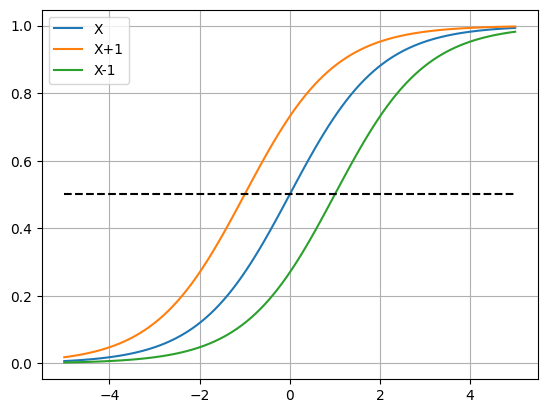

In [3]:
# sigmoid funcion
import numpy as np
import matplotlib.pyplot as plt
def sigmoid(x):
  return 1 / (1 + np.exp(-x))

# define domain
X = np.linspace(-5, 5, 100)
# plot sigmoid function
plt.plot(X, sigmoid(X), label= "X")
plt.plot(X, sigmoid(X+1), label= "X+1")
plt.plot(X, sigmoid(X-1), label= "X-1")

# plot a line through y=0.5
plt.plot([-5, 5], [0.5, 0.5], 'k--')
plt.grid()
plt.legend()
plt.show()

Podriamos pensar que en algun momento queremos que la activacion sea 0. Por ejemplo si la activacion es sigmoid logistic

$$\frac{1}{1 + \mathrm{e}^{-\sum_{i=0}^n \theta_i x_i}} \to 0 $$

La idea es que $\theta_0 + \sum_{i=1}^n \theta_i x_i \ll -1$
donde entonces

$$\theta_0 \ll -1 - \sum_{i=1}^n \theta_i x_i $$

En las redes neuronales (graficas de la clase anterior) el bias era el nodo amarillo arriba. Ese nodo siempre debe tenter un valor $+1$.




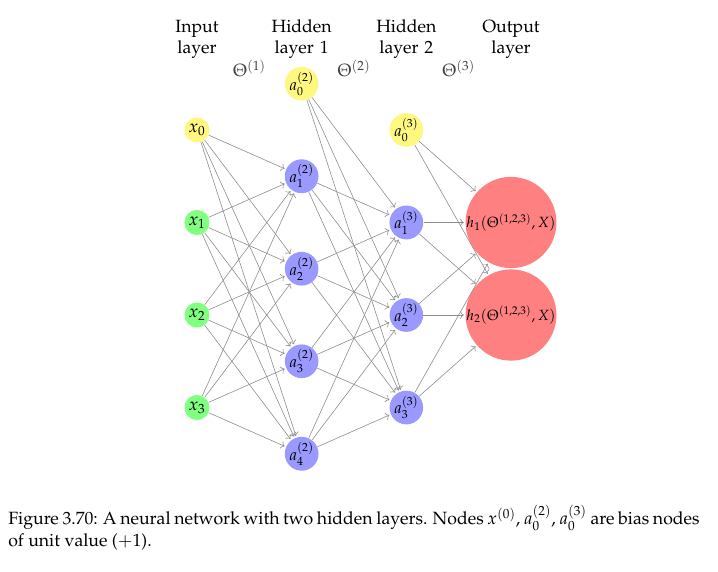

En la clase anterior mostramos como hacer la propagacion hacia adelante (forward).

Los pasos fueron:

1. La entrada $X$, la podemos llamar $A^{(1)}$. Es una matriz, se le agragan unos a la primera columna.
2. Se calcula $Z^{(2)}= A^{(1)} \Theta^{(1)}$
3. Se calclula la activacion $A^{(2)} = S(Z^{(2)})$
4. Asi sucesivamente hasta recorrer todas las capas.

El algoritmo lo muestro en la Figura Algoritmo 6.



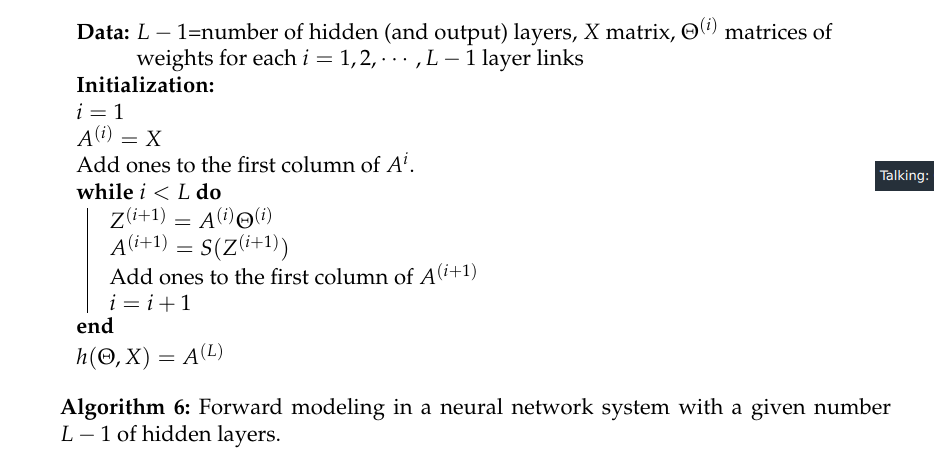

Recuerde la tabla de XOR

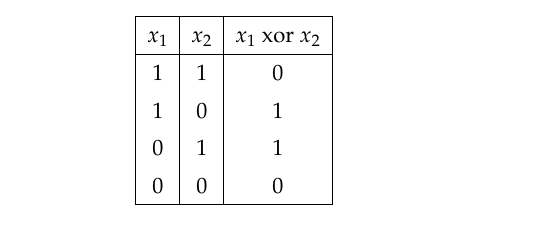

Vamos a ver que el XOR se puede resolver con 3 capas: 1 de entrada, 1 oculta y una de salida.o


i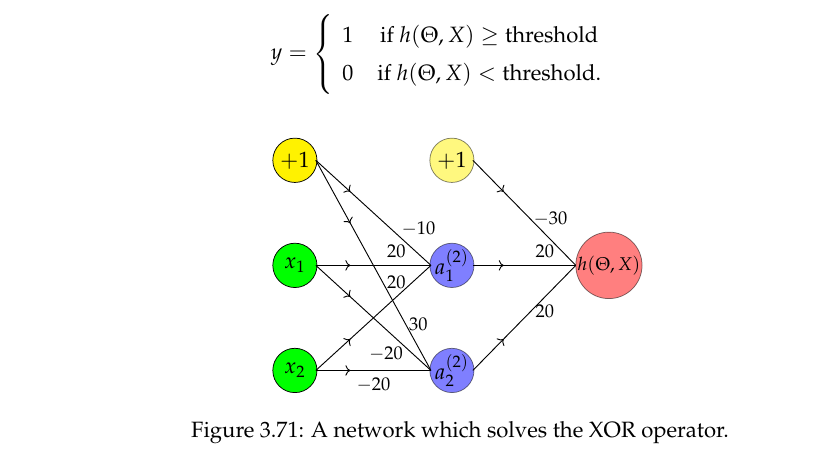

Recuerde que las iteraciones que se hacen son:

$$Z^{(\ell+1)} = A^{(\ell)} \Theta^{(\ell)} $$
$$A^{(\ell+1)} = S(Z^{\ell +1}) $$



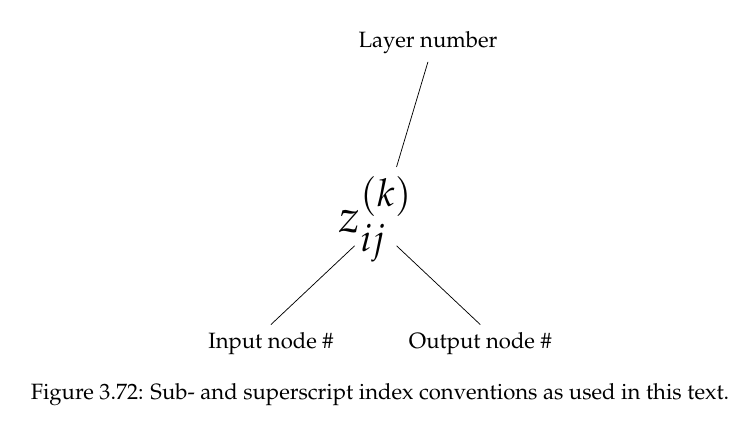

Propagamos hacia adelante los datos del XOR

* Para $(x_1, x_2) = (1, 1)$

$$z_{11}^{(2)}= -10 + 20 x_1 + 20 x_2 = 30  $$
$$a_{11}^{(2)}= S(z_{11}^{(2)}) = \frac{1}{1 + \mathrm{e}^{-30}} \approx 1$$
$$z_{12}^{(2)} = 30-20 x_1 - 20 x_2 = -10 $$
$$a_{12}^{(2)} = S(z_{12}^{(2)}) = \frac{1}{1 + \mathrm{e}^{10}} = 0.0000454 \approx 0$$

Vamos para la tercera capa


$$z_{11}^{(3)} = -30 + 20 a_{11}^{(2)} + 20 a_{12}^{(2)} \approx -10 $$
$$ a_{11}^{(3)} = h(\Theta, x^{(1)}) = S(z_{11}^{(3)}) = 0 $$

De forma que


$$  y   |_{(1,1)} = 0 $$


* Para $(x_1, x_2) = (1, 0)$

$$z_{21}^{(2)}= -10 + 20 x_1 + 20 x_2 = 10  $$
$$a_{21}^{(2)}= S(z_{11}^{(2)}) = \frac{1}{1 + \mathrm{e}^{-10}} \approx 1$$
$$z_{22}^{(2)} = 30-20 x_1 - 20 x_2 = 10 $$
$$a_{22}^{(2)} = S(z_{12}^{(2)}) = \frac{1}{1 + \mathrm{e}^{-10}} \approx 1$$

Vamos para la tercera capa


$$z_{21}^{(3)} = -30 + 20 a_{21}^{(2)} + 20 a_{22}^{(2)} \approx 10 $$
$$ h(\Theta, x^{(2)}) = S(z_{11}^{(3)}) \approx 1 $$

De forma que


$$  y    \Big|_{(1,0)} = 1 $$

$$  y   |_{(1,0)} = 0 $$


* Para $(x_1, x_2) = (0, 1)$

$$z_{31}^{(2)}= -10 + 20 x_1 + 20 x_2 = 10  $$
$$a_{31}^{(2)}= S(z_{31}^{(2)}) = \frac{1}{1 + \mathrm{e}^{-10}} \approx 1$$
$$z_{32}^{(2)} = 30-20 x_1 - 20 x_2 = 10 $$
$$a_{32}^{(2)} = S(z_{32}^{(2)}) = \frac{1}{1 + \mathrm{e}^{-10}} \approx 1$$

Vamos para la tercera capa


$$z_{31}^{(3)} = -30 + 20 a_{21}^{(2)} + 20 a_{22}^{(2)} \approx 10 $$
$$ h(\Theta, x^{(2)}) = S(z_{11}^{(3)}) \approx 1 $$

De forma que


$$  y    \Big|_{(0,1)} = 1 $$




* Para $(x_1, x_2) = (0, 0)$

$$z_{41}^{(2)}= -10 + 20 x_1 + 20 x_2 = -10  $$
$$a_{41}^{(2)}= S(z_{41}^{(2)}) = \frac{1}{1 + \mathrm{e}^{10}} \approx 0$$
$$z_{42}^{(2)} = 30-20 x_1 - 20 x_2 = 30 $$
$$a_{42}^{(2)} = S(z_{42}^{(2)}) = \frac{1}{1 + \mathrm{e}^{-30}} \approx 1$$

Vamos para la tercera capa


$$z_{41}^{(3)} = -30 + 20 a_{41}^{(2)} + 20 a_{42}^{(2)} \approx -10 $$
$$ h(\Theta, x^{(2)}) = S(z_{41}^{(3)}) \approx 0 $$

De forma que


$$  y    \Big|_{(0,0)} = 0 $$

Las matrices a propagar son

Matriz de entrada.
$$X = \begin{pmatrix}  1 & 1 & 1 \\ 1&  1 & 0 \\ 1 & 0 & 1 \\ 1 & 0 & 0 \end{pmatrix}  $$


Matriz de parametros $\Theta^{(1)}$ (primera capa)

$$
\Theta^{(1)} =
\begin{pmatrix}
-10 & 30 \\ 20 &  -30 \\ 20 & -20
\end{pmatrix}
$$

Matriz de parametros $\Theta^{(2)}$ (segunda capa)
$$\Theta^{(2)}= \begin{pmatrix} -30 \\ 20 \\ 20 \end{pmatrix} $$

Veamos el progama en `Python` Para propagar hacia adelante este modelo.

In [7]:
import numpy as np

# define the sigmoid funcion
def s(x):
    return 1/(1 + np.exp(-x))

# matriz de entrada del XOR
X = np.array( [[0,0], [0,1], [1, 0] , [1,1]])
n = len(X)

# add  a column of ones at first place
ones = np.ones( shape=(n,1), dtype='float')



X = np.column_stack((ones, X))

print('X = \n', X)
print()

Theta1 = np.array( [[-10,30], [20, -20], [20, -20]])
print("Theta 1\n", Theta1)
print()

Theta2 = np.array([-30, 20, 20])
print("Theta 2\n", Theta2)
print()

# Z1
Z1 = X.dot(Theta1)
print("Z1=\n", Z1)
A = s(Z1)

# we add ones to first column of A
A = np.column_stack((ones, A))
print("A2\n", A)
print()

# Z2
Z2 = A.dot(Theta2)
print("Z2=\n", Z2)
print()
H = s(Z2)
print("H\n", H)
print()
# calcular la tabla logica con umbal 0.5
B = (H>0.5)
print("B=\n", B)

X = 
 [[1. 0. 0.]
 [1. 0. 1.]
 [1. 1. 0.]
 [1. 1. 1.]]

Theta 1
 [[-10  30]
 [ 20 -20]
 [ 20 -20]]

Theta 2
 [-30  20  20]

Z1=
 [[-10.  30.]
 [ 10.  10.]
 [ 10.  10.]
 [ 30. -10.]]
A2
 [[1.00000000e+00 4.53978687e-05 1.00000000e+00]
 [1.00000000e+00 9.99954602e-01 9.99954602e-01]
 [1.00000000e+00 9.99954602e-01 9.99954602e-01]
 [1.00000000e+00 1.00000000e+00 4.53978687e-05]]

Z2=
 [-9.99909204  9.99818409  9.99818409 -9.99909204]

H
 [4.54391049e-05 9.99954520e-01 9.99954520e-01 4.54391049e-05]

B=
 [False  True  True False]


# Intuicion acerca de las redes neuronales.

De cierta forma las redes neuronales son como una caja negra, por que no sabemos exactamente que pasa en las capas ocultas. Se ve claramente la salida y la entrada pero que pasa en las capas ocultas. Desafortunadamente las MLP no son tan intuitivas como las CNN (Convolutional Neural Networks, proximo semestre).
En las CNN, por ejemplo el numero 4 como en la siguiente figura.



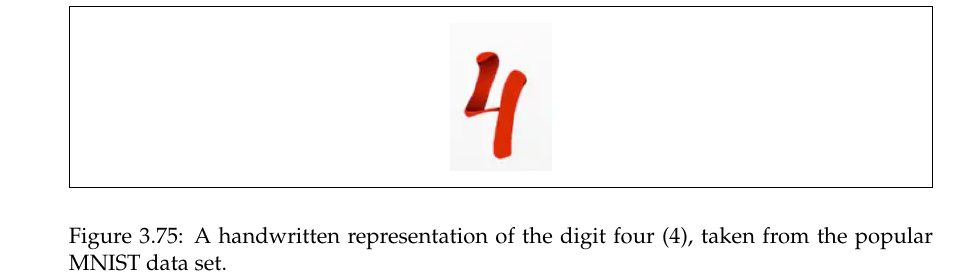

Se puede ver como una barra vertical corta, otra un mas larga y una horizontal. La red tienen a favorcer estos patrones y a penalizar patrones con circulos (como el numero 8 o el 0).

Si podemos graficar las capas ocultas en MLP pero no hay mucha intuicion en esto.

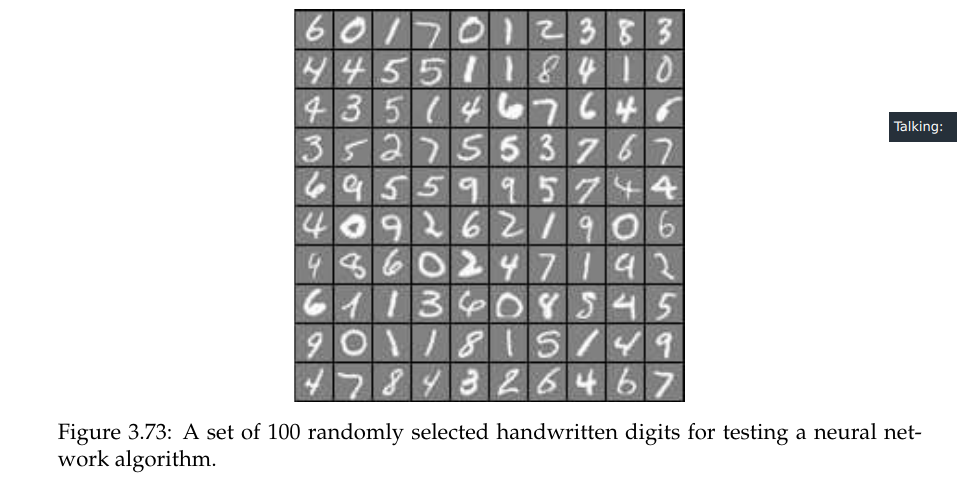

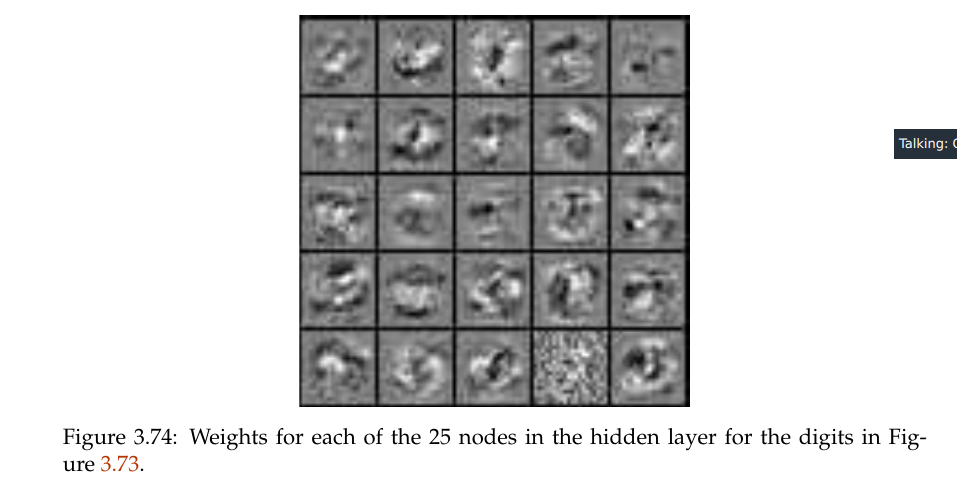

La Figura 3.37 muestra algunos datos del MNIST (ya lo explique lo estudiamos en una tarea), la 3.74 la capa oculta, que no muestra mucho.

Grant Sanderson's
[What is a Neural Network](https://www.youtube.com/watch?v=aircAruvnKk)
muestra este tutorial en la intucion acerca de lo que esta detras de una red neuronal.

A la 8:00 pm


Dos asuntos importantes para resolver

* La funcion de costo
* El gradiente de esta.


## Funcion de costo para las MLP.
La funcion de costo la llamamos $J$. Son necesarias junto con el gradinte para poder optimizar la red mediante la iteracion

$$\Theta^{(i+1)}  = \Theta^{(i)} - \alpha \nabla_{\Theta} J \tag{0} $$

Comenzamos con la funcion de costo de regresion logisitca.


$$J(\theta) = -\frac1m \sum_{i=1}^m y_i \log[ h(\theta, x^{(i)})] + (1 - y_i) \log [ 1  - h(\theta, x^{(i)}] + \frac{\lambda}{2m} \sum_{j=1}^n \theta_j^2 $$

Esta funcion la podemos extender al problema multiclase

$$J(\theta) = -\frac1m \sum_{i=1}^m \sum_{k=1}^K y_i^{(k)} \log[ h_k(\theta, x^{(i)})] + (1 - y_i^{(k)}) \log [ 1  - h_k(\theta, x^{(i)}] + \frac{\lambda}{2m} \sum_{\ell=1}^L \sum_{i=1}^{n_{\ell}} \sum_{j=1}^{n_{\ell +1}} (\Theta_{ij}^{(\ell)})^2 \tag{1}$$

La Ecuacion (1) es la funcion de costo para nuestras MLP.

## Backpropagation (Propagacion hacia atras).
Aca es donde esta la "magina" de las redes neuronales.
Lo que vamos a hacer es, comenzando desde la ultima capa $L$, obtener el gradiente (en esta capa) y luego el gradiente en $L-1$, y luego en la capa $L-2$ y asi sucesivamente hasta llegar a la capa $\ell=1$. Los parametros del MLP estan datos por el "tensor" de rango 3 $\Theta_{ij}^{(\ell)}$, donde $i$ es el indice del nodo de salida, $j$ el indice del nodo de entrada y $\ell$ el indice de la capa.

* El proceso comienza con con un tensor $\Theta_{ij}^{\ell}$ aleatorio. Obvio este no va a dar buenos resultados.

* Luego viene la propagacion hacia adelante con esos parametros.

* Por ultimo la propagacion hacia atras hallando el gradiente.

* Una vez regresa a la primera capa, se aca la primera **epoca**. Si regresamos a la propagacion hacia adelante hasta el final y y nos devolvemos hallando el gradiente y actualizando los parametros con la Ecuacion (0), comenzamos la segunda epoca

* Y asi sucesivamente hasta la epoca $n$.
Asumimos que la funcion de activacion es la sigmoid $S=S(t)$.

Veamos.

### Propagacion hacia adelante.
Tenemos $L+1$ capas: 1 de entrada, $L-1$ ocultas y una de salida.

\begin{eqnarray}
A^{(1)} &=& X \\
A^{(2)} &=& S(Z^{(2)}) = S( X \Theta^{(1)}) \\
A^{(3)} &=& S(Z^{(3)}) S(A^{(2)} \Theta^{(2)}) \\
&\vdots & \\
A^{(L-1)} &=& S(Z^{(L-1)}) = S(A^{(L-2)} \Theta^{(L21)}) \\
A^{(L)} &=&  S(Z^{(L)}) = S( A^{(L-1)} \Theta^{(L-1)}) \\
h(\Theta, X) &=& A^{(L+1)} = S(Z^{(L+1)}) = S(A^{(L)} \Theta^{(L)})
\end{eqnarray}

Llegamos al final de la red y nos vamos devolver.

### Propagacion hacia atras.

$$h_{ij}(\Theta, X) =S \left ( \sum_k A_{ik}^{(L)} \Theta_{kj}^{(L)} \right)= S_{ij} = A_{ij}^{(L+1)}  $$

Recordemos la funcion de costo

$$J(\Theta, X) = -\frac1m \sum_i \sum_j y_{ij} \log [ h_{ij}(\Theta, X)] + (1 - y_{ij}) \log [1 - h_{ij}(\Theta , X)]. $$
Por el momento no me complico con la regularizacion, esta la vemos al final.

Debemos hallar $\nabla_{\Theta} J(\Theta, X)$. Recuerde que
$$S'(t) = S(t) (1 - S(t)). $$

Empezamos (puras derivadas parciales).
Recuerde

$$\frac{\partial \Theta_{kj}^{(L)}}{\partial \Theta_{pq}^{(L)}}=
\delta_{pk} \delta_{qj} $$

\begin{eqnarray}
\frac{\partial J(\Theta, X)}{\partial \Theta_{pq}^{(L)}}
&=& -\frac1m \sum_i \sum_j y_{ij} \frac{S_{i.j}(1-S_{ij})}{S_{ij}}
\left ( \sum_k A_{ik}^{(L)} \delta_{pk} \delta_{qj} \right )
+ \frac1m \sum_i \sum_j (1 - y_{ij})  \frac{S_{ij} (1 - S_{ij})}{1 -S_{ij}}
\left ( \sum_k A_{ik}^{(L)} \delta_{pk} \delta_{qj} \right )
\\
&=& \frac1m \sum_i -y_{iq} (1 - S_{iq}) A_{ip}^{(L)} + (1 - y_{ij}) S_{iq} A_{ip}^{(L)} \\
&=& \frac1m \sum_i -y_{iq} A_{ip}^{(L)} + y_{iq} S_{iq}A_{ip}^{(L)} + S_{iq} A_{ip}^{(L)} - y_{ij} S_{iq} A_{ip}^{(L)} \\
&=& \frac1m \sum_i (S_{iq} - y_{iq}) A_{ip}^{(L)} \\
&=& \frac1m \sum_i (A_{iq}^{(L+1)} - y_{iq}) A_{ip}^{(L)} \\
&=& \frac1m (A^{(L)}_p)^T ( A^{(L+1)} - Y)_q
\quad , \text{ vectorizacion}
\end{eqnarray}


Resumiendo

$$\left ( \frac{\partial J(\Theta, X)}{\partial \Theta^{(L)}}\right ) =  \frac1m (A^{(L)})^T ( A^{(L+1)} - Y)_{pq}  $$

Toca seguir con $L-1$. Recordemos cosas

$$h_{ij}(\Theta , X) = S \left (  \sum_k A_{ik}^{(L)} \Theta_{kj}^{(L)} \right ) = A_{ij}^{(L+1)} $$

$$A_{ik}^{(L)} = S(Z_{ik}^{(L)}) = S \left ( \sum_r A_{ir}^{(L-1)} \Theta_{rk}^{(L-1)} \right ) \tag{2} $$

Vamos a tomar las derivadas parciales en dos partes de $J$.

\begin{eqnarray}
\frac{\partial \log (h_{ij}(\Theta, X))}{\partial \Theta_{pq}^{(L-1)}}
&=& \frac{S_{ij}(1 -S_{ij})}{S_{ij}}  \sum_k \frac{\partial A_{ik}^{(L)}}{\partial \Theta_{pq}^{(L-1)}} \Theta_{kj}^{(L)} \\
&=& (1 - A_{ij}^{(L+1)})  \sum_k \frac{\partial A_{ik}^{(L)}}{\partial \Theta_{pq}^{(L-1)}} \Theta_{kj}^{(L)}  \tag{3}
\end{eqnarray}

Usamos ahora la ecuacion (2) para hallar

$$\frac{\partial A_{ik}^{(L)}}{\partial \Theta_{pq}^{(L-1)}}
= S_{ik} (1 - S_{ik}) \sum_r A_{ir}^{(L-1)} \delta_{rp} \delta_{kq} =
A_{ik}^{(L)} (1 - A_{ik}^{(L)}) A_{ip}^{(L-1)} \delta_{qk}
$$


Insertamos esto en la ecuacion (3)

\begin{eqnarray}
\frac{\partial \log (h_{ij}(\Theta, X))}{\partial \Theta_{pq}^{(L-1)}}
&=& (1 - A_{ij}^{(L+1)})  \sum_k
A_{ik}^{(L)} (1 - A_{ik}^{(L)}) A_{ip}^{(L-1)} \delta_{qk}
 \Theta_{kj}^{(L)}  
\end{eqnarray}
Colapsando la suma por el delta de Kronecker

\begin{eqnarray}
\frac{\partial \log (h_{ij}(\Theta, X))}{\partial \Theta_{pq}^{(L-1)}}
= (1 - A_{ij}^{(L+1)}) (1 - A_{iq}^{(L)}) A_{ip}^{(L-1)} \Theta_{qj}^{(L)}).
\end{eqnarray}

De la misma forma para el segundo termino

\begin{eqnarray}
\frac{\partial \log (1 - h_{ij}(\Theta, X))}{\partial \Theta_{pq}^{(L-1)}} &=& -\frac{S_{ij}(1 - S_{ij})}{1 - S_{ij}}
 \sum_k \frac{\partial A_{ik}^{(L)}}{\partial \Theta_{pq}^{(L-1)}} \Theta_{kj}^{(L)}  \\
 &=& -A_{ij}^{(L+1)}  \sum_k \frac{\partial A_{ik}^{(L)}}{\partial \Theta_{pq}^{(L-1)}} \Theta_{kj}^{(L)}  \\
 &=& -A_{ij}^{(L+1)} (A_{iq}^{(L)} (1 - A_{iq}^{(L)}) A_{ip}^{(L-1)} \Theta_{qj}^{(L)}
\end{eqnarray}

Ahora juntamos los dos

\begin{eqnarray} y_{ij} \frac{\partial \log (h_{ij}(\Theta, X))}{\partial \Theta_{pq}^{(L-1)}} + (1 - y_{ij}) \frac{\partial \log (1 - h_{ij}(\Theta, X))}{\partial \Theta_{pq}^{(L-1)}} =
\left ( A_{iq}^{(L)} (1 - A_{iq}^{(L)} ) A_{ip}^{(L-1)} \Theta_{qj}^{(L)} ) [ y_{ij} (1 - A_{ij}^{(L+1)})  - (1 - y_{ij}) A_{ij}^{(L+1)} ]  \right )   \\
= (y_{ij} - A_{ij}^{(L+1)}) (A_{iq}^{(L)} (1 - A_{iq}^{(L)}) A_{ip}^{(L-1)} \Theta_{qj}^{(L)}
\end{eqnarray}







Usando la funcion de costo encontramos que

\begin{eqnarray}
\frac{\partial J(\Theta, X)}{\partial \Theta_{pq}^{(L-1)}}
&=& \frac1m \sum_i \sum_j
(A_{ij}^{(L+1)} - y_{ij}) (A_{iq}^{(L)} (1 - A_{iq}^{(L)}) A_{ip}^{(L-1)} \Theta_{qj}^{(L)} \\
&=& \frac1m \sum_i A_{iq}^{(L)} (1 - A_{iq}^{(L)}) A_{ip}^{(L-1)} \sum_j (A_{ij}^{(L+1)} - y_{ij}) \Theta_{qj}^{(L)} \\
&=& \frac1m \sum_i A_{iq}^{(L)} (1 - A_{iq}^{(L)}) A_{ip}^{(L-1)} [( A^{(L+1)} - Y)(\Theta^{(L)})^T]_{iq} \\
&=& \frac1m \sum_i  A_{ip}^{(L-1)}  [( A^{(L+1)} - Y)(\Theta^{(L)})^T]_{iq} A_{iq}^{(L)} (1 - A_{iq}^{(L)}) \\
&=& \frac1m \sum_i  A_{ip}^{(L-1)}  [( A^{(L+1)} - Y)(\Theta^{(L)})^T]_{iq}  [ A^{(L)} \circ  (1 - A^{(L)}]_{iq} \\
&=& \frac1m [(A^{(L-1)})^T]_p [ (A^{(L+1)} - Y)(\Theta^{(L)})^T A^{(L)} \circ (1 - A^{(L)}]_q
\end{eqnarray}

Las deivadas para $\ell=L-2, L-3, \cdots, 1$ son de la misma forma


$$
\frac{\partial J(\Theta, X)}{\partial \Theta_{pq}^{(\ell)}}
=  \frac1m [(A^{(\ell})^T]_p [ (A^{(\ell+2)} - Y)(\Theta^{(\ell+1)})^T A^{(\ell+1)} \circ (1 - A^{(\ell+1)}]_q  
$$

Ya con esto se tiene el algoritmo.


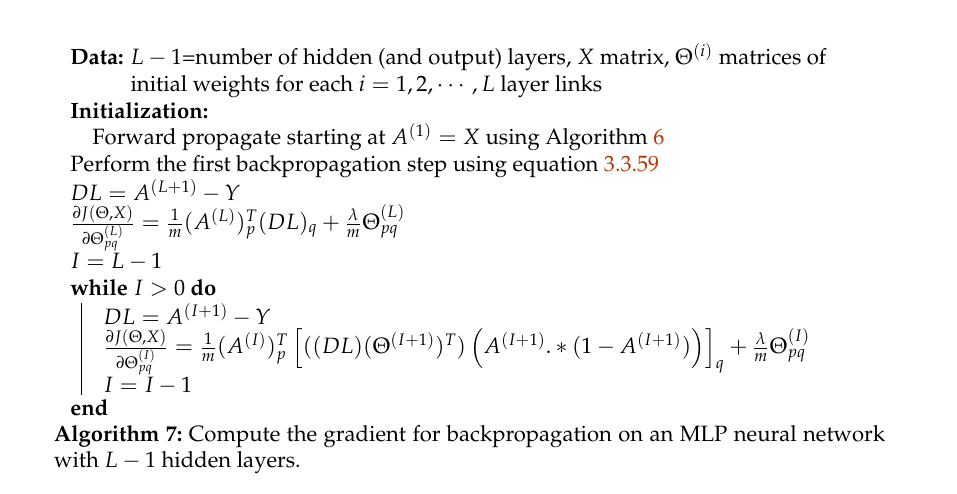

Queda solo la fuuncion de regularizacion

$$R = \frac{\lambda}{2 m} \sum_{j=1}^L \sum_{i=1}^{n_j} \sum_{=1}^{n_{j+1}} (\Theta_{ij}^{(l)})^2 $$

$$\frac{\partial R}{\partial \Theta_{pq}^{\ell}} =
\frac{\lambda}{m}  \sum_{j=1}^L \sum_{i=1}^{n_j} \sum_{=1}^{n_{j+1}} \frac{\partial \Theta_{ij}^{(l}}{\partial \Theta_{pq}^(m)}
\Theta_{ij}^{\ell} = \frac{\lambda}{m} \sum \sum \sum \delta_{ip} \delta_{jq} \delta_{lm} \Theta_{ij}^{\ell}$$
